<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 9 </H1>

In [456]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import scipy
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt



np.random.seed(2021)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

# Simple Regression

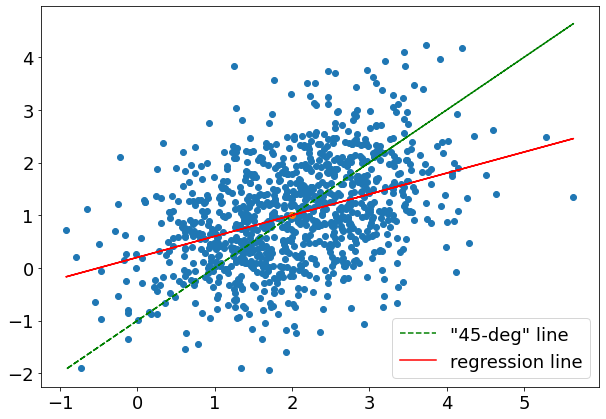

In [457]:
from scipy.stats import norm

rho = .4
sigX = 1
sigY = 1

mu_X = 2
mu_Y = 1

n = 1000

z = norm.rvs(size=(n, 2)).T
Sig = np.array([[sigX ** 2, sigX * sigY * rho],
                [sigX * sigY * rho, sigY ** 2]])
Sig_sqrt = np.linalg.cholesky(Sig)
x, y = np.array([[mu_X, mu_Y]]).T + Sig_sqrt @ z

plt.scatter(x, y)
plt.scatter(mu_X, mu_Y)

y_deg45 = mu_Y + sigY/sigX * (x - mu_X)
plt.plot(x, y_deg45, '--g')  # "45deg line"

y_reg = mu_Y + rho*sigY/sigX * (x - mu_X) # regression line
plt.plot(x, y_reg, 'r')
plt.legend(['"45-deg" line', 'regression line'])
plt.savefig("regression.png")
plt.show()

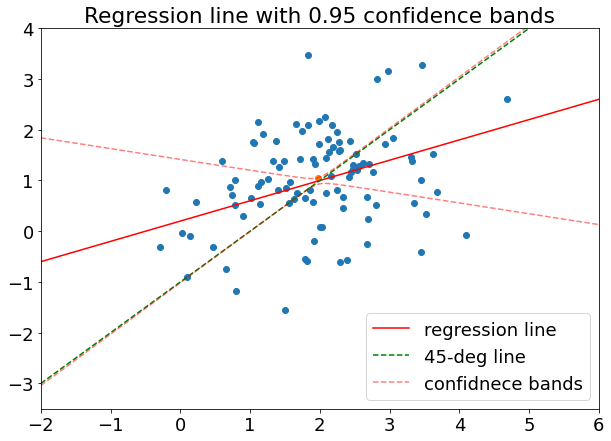

In [472]:
from scipy.stats import t

rho = .4
sigX = 1
sigY = 1

mu_X = 2
mu_Y = 1

n = 100

z = norm.rvs(size=(n, 2)).T
Sig = np.array([[sigX ** 2, sigX * sigY * rho],
                [sigX * sigY * rho, sigY ** 2]])
Sig_sqrt = np.linalg.cholesky(Sig)
x, y = np.array([[mu_X, mu_Y]]).T + Sig_sqrt @ z

plt.scatter(x, y)
plt.scatter(x.mean(), y.mean())

y_hat = mu_Y + rho*sigY/sigX * (x - mu_X)

xx = np.linspace(-2, 6, 100)

y_reg = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_deg45 = mu_Y + sigY/sigX * (xx - mu_X)

plt.plot(xx, y_reg, 'r')
plt.plot(xx, y_deg45, '--g')

t_alpha = t.isf(.05 / 2, df = n-2)

s2 = np.linalg.norm(y - y_hat)/(n-2)
Sxx = np.mean((x - np.mean(x))**2)


y_reg2 = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_band = t_alpha * np.sqrt(s2) * np.sqrt(1/n + (xx - np.mean(x))**2/Sxx )

plt.plot(xx, y_reg2 + y_band, '--r', alpha=.5)
plt.plot(xx, y_reg2 - y_band, '--r', alpha=.5)
plt.xlim((-2, 6))
plt.ylim((-3.5, 4))

plt.title(f"Regression line with {1-sig_level} confidence bands")
plt.legend(['regression line', '45-deg line', 'confidnece bands'])
plt.savefig("confidence_band.png")
plt.show()

### Prediction bands
We want to predict $y_{n+1}$ given $x_{n+1}$ and $(y_i,x_i)$, for $i=1,\ldots,n$.

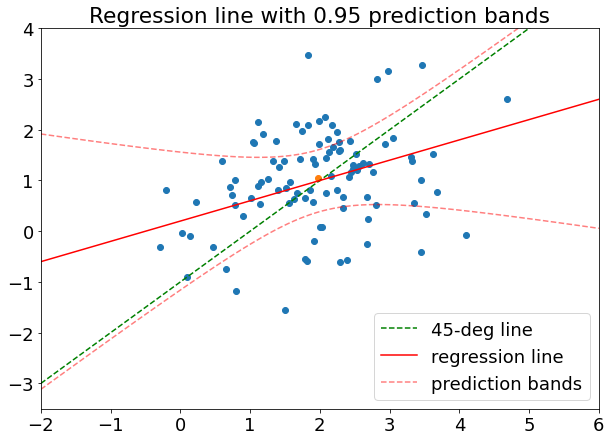

In [474]:
from scipy.stats import t

plt.scatter(x, y)
plt.scatter(x.mean(), y.mean())

plt.plot([mu_X - 4, mu_X+4], [mu_Y-4, mu_Y+4], '--g')  # "45deg line"

y_hat = mu_Y + rho*sigY/sigX * (x - mu_X)  # regression value for every x

xx = np.linspace(-2, 6, 100)
y_reg = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line

plt.plot(xx, y_reg, 'r')

t_alpha = t.isf(sig_level / 2, df = n-2)

s2 = np.linalg.norm(y - y_hat)/(n-2)
Sxx = np.mean((x - np.mean(x))**2)


y_reg2 = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_band = t_alpha * np.sqrt(s2) * np.sqrt(1 + 1/n + (xx - np.mean(x))**2/Sxx )

plt.plot(xx, y_reg2 + y_band, '--r', alpha=.5)
plt.plot(xx, y_reg2 - y_band, '--r', alpha=.5)
plt.xlim((-2, 6))
plt.ylim((-3.5, 4))

plt.title(f"Regression line with {1-sig_level} prediction bands")
plt.legend(['45-deg line', 'regression line', 'prediction bands'])
plt.savefig("prediction_band.png")
plt.show()

# Multiple Regression (House Prices)

In [427]:
# 
data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['h-MSZoning'] = data.MSZoning.apply(hash) # convert this categorical data to numeric

In [439]:
data1 = data.select_dtypes('number').dropna()\
            .rename(columns = {'1stFlrSF': 'FirstFlrSF',
                              '2ndFlrSF': 'SecondFlrSF'}) # stats model formula cannot have
                                                          # covaraite names starting with non letter

variables =[
    'SalePrice',
    'LotArea', 
    'YearBuilt',
    #'LandSlope',
     'YrSold', 'MoSold', 
     'Fireplaces', 
    'GarageCars', 'ScreenPorch', 
     'HalfBath', 'FullBath',
     'GrLivArea', 
     'BedroomAbvGr',
    'FirstFlrSF', 
    'SecondFlrSF',
    'TotRmsAbvGrd',
    'LowQualFinSF', 'TotalBsmtSF',
    'LotFrontage', 'WoodDeckSF',
     'OverallQual',
     'OverallCond'
]

data1 = data1.filter(variables).dropna()
data1['logSalePrice'] = np.log(data1['SalePrice'])

In [440]:
def detect_outliers(df, q=0.05):
    lower_outliers = df < df.quantile(q)
    upper_outliers = df > df.quantile(1-q)
    return lower_outliers + upper_outliers

mask = detect_outliers(data1, .01).any(1)
print(f"Masked a fraction of {mask.mean()} of the data due to outliers")
data2 = data1[mask]


#pd.plotting.scatter_matrix(data2, hist_kwds={'bins':30})
#plt.show()
#plt.rcParams["figure.figsize"] = (10,5)
#plt.rcParams.update({'font.size': 18})


Masked a fraction of 0.14971209213051823 of the data due to outliers


/usr/local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [441]:
import statsmodels.formula.api as smf

covariates = [var for var in variables if var not in ['SalePrice', 'logSalePrice']]

target = 'SalePrice'
model = smf.ols(formula= target + " ~ " + " + ".join(covariates), data=data2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                    OLS                  Adj. R-squared:         0.883     
Dependent Variable:       SalePrice            AIC:                    3768.6022 
Date:                     2022-05-17 20:05     BIC:                    3829.5993 
No. Observations:         156                  Log-Likelihood:         -1864.3   
Df Model:                 19                   F-statistic:            62.62     
Df Residuals:             136                  Prob (F-statistic):     1.27e-57  
R-squared:                0.897                Scale:                  1.6118e+09
---------------------------------------------------------------------------------
                Coef.       Std.Err.      t    P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------
Intercept    2560764.0137 5387498.1441  0.4753 0.6353 -8093340.9999 13214869.0272
LotArea            3.7647       1.5377  2.4483 0.0156        0.7239        6.8056
YearBuilt        615.8237     154.0794  3.9968 0.0001      311.1223      920.5250
YrSold         -1936.9900    2689.4199 -0.7202 0.4726    -7255.4812     3381.5013
MoSold         -2892.6879    1240.8572 -2.3312 0.0212    -5346.5583     -438.8174
Fireplaces     13939.9606    5921.2136  2.3542 0.0200     2230.4008    25649.5204
GarageCars     14141.9703    6111.6964  2.3139 0.0222     2055.7193    26228.2213
ScreenPorch       46.7727      38.9005  1.2024 0.2313      -30.1553      123.7007
HalfBath        -225.0973    7495.1871 -0.0300 0.9761   -15047.2853    14597.0907
FullBath       18502.5362    9108.9821  2.0312 0.0442      488.9705    36516.1020
GrLivArea         32.4193      13.3371  2.4308 0.0164        6.0443       58.7943
BedroomAbvGr  -24626.4486    4779.6062 -5.1524 0.0000   -34078.4103   -15174.4868
FirstFlrSF         6.4425      15.5607  0.4140 0.6795      -24.3297       37.2148
SecondFlrSF        9.3299      12.7643  0.7309 0.4661      -15.9122       34.5720
TotRmsAbvGrd   10566.2024    3451.2425  3.0616 0.0027     3741.1607    17391.2442
LowQualFinSF      16.6472      29.2494  0.5691 0.5702      -41.1953       74.4898
TotalBsmtSF       31.9789      14.4500  2.2131 0.0286        3.4031       60.5547
LotFrontage     -344.3833     171.7354 -2.0053 0.0469     -684.0004       -4.7662
WoodDeckSF       -44.9026      22.5465 -1.9916 0.0484      -89.4898       -0.3155
OverallQual    19147.9077    3604.5880  5.3121 0.0000    12019.6158    26276.1995
OverallCond     6670.4843    2752.1975  2.4237 0.0167     1227.8465    12113.1221
---------------------------------------------------------------------------------
Omnibus:               24.241         Durbin-Watson:            2.112            
Prob(Omnibus):         0.000          Jarque-Bera (JB):         42.375           
Skew:                  0.755          Prob(JB):                 0.000            
Kurtosis:              5.058          Condition No.:            57832503598726640
=================================================================================
* The condition number is large (6e+16). This might indicate             strong
multicollinearity or other numerical problems.
"""

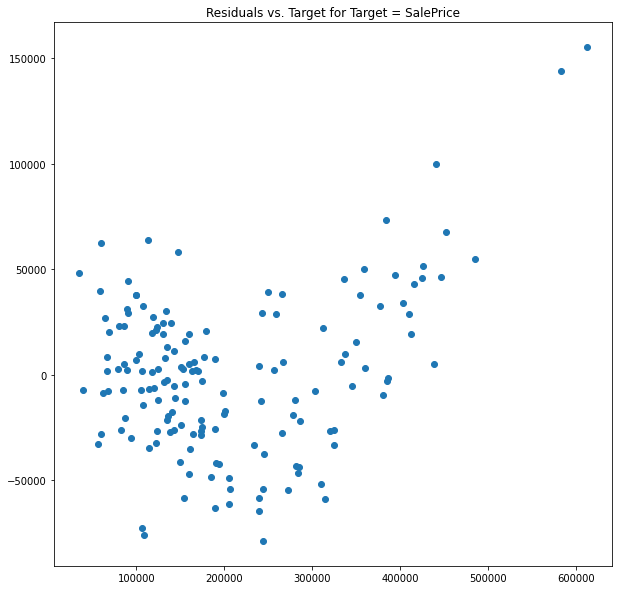

In [442]:
plt.rcParams['figure.figsize'] =  [10, 10]
plt.rcParams.update({'font.size': 10})

plt.scatter(data2.SalePrice, model.resid)
plt.title(f"Residuals vs. Target for Target = {target}")
plt.show()

The increased residuals for large values of the target usually indicates unstable variance (growing with value). A variance-stabilizing transformation is a good idea in this case.


R^2 = 0.9377210864235349


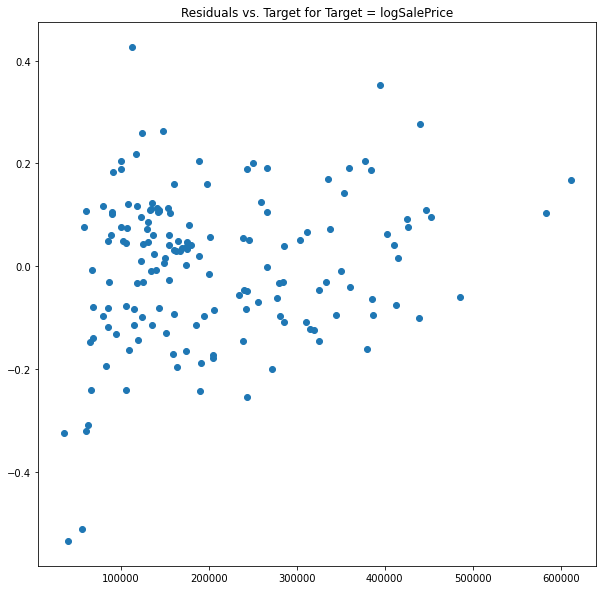

In [443]:

target = 'logSalePrice'
model2 = smf.ols(formula= target + " ~ " + " + ".join(covariates), data=data2).fit()
print(f"R^2 = {model2.rsquared}")

plt.scatter(data2.SalePrice, model2.resid)

plt.title(f"Residuals vs. Target for Target = {target}")
plt.show()



### Face value interpertation 
Missleading for ``FullBath`` and ``BedroomAbvGr``

### Interplay:
Correlation between ``OverallQual`` and ``OverallCond``


### Partial Correlation

In this example we want to ask whether the number of fireplaces affects positively on the price of a house, so that we know to build some in order to increase the value of ours. However, what if the number of fireplaces is merely a function of the number of rooms which responsible to the increase. In this case, adding additional fireplaces would not affect the price (becasue we did not changed the number of rooms). To account for the effect of fireplaces, we can adjust for the number of rooms. 

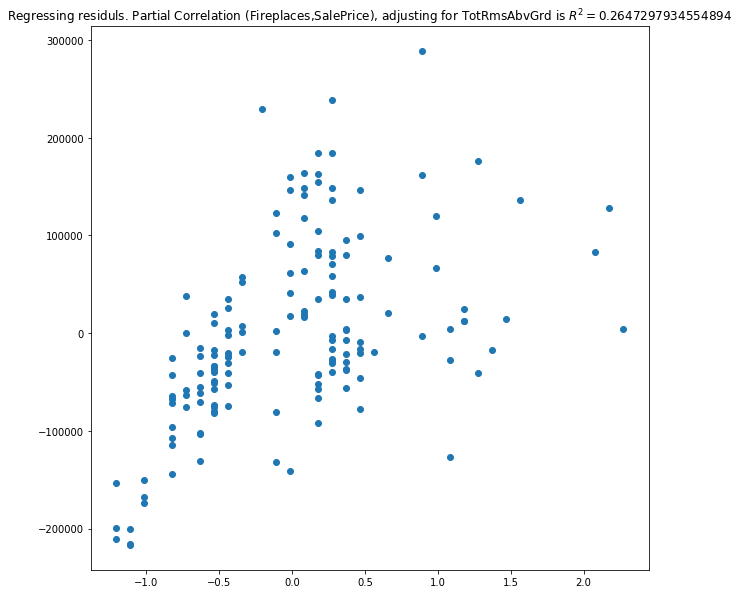

In [447]:
import statsmodels.api as sm

varX = 'Fireplaces'
varY = 'SalePrice'
varZ = 'TotRmsAbvGrd' # total rooms above ground level

model_LotFrontageYearBuilt = smf.ols(formula= f"{varX} ~ {varZ}", data=data2).fit()
model_SalePriceYearBuilt = smf.ols(formula= f"{varY} ~ {varZ}", data=data2).fit()

X = sm.add_constant(model_LotFrontageYearBuilt.resid)
y = model_SalePriceYearBuilt.resid
model_res = sm.OLS(y, X).fit()
plt.scatter(model_LotFrontageYearBuilt.resid, model_SalePriceYearBuilt.resid)
plt.title(fr"Regressing residuls. Partial Correlation ({varX},{varY}), adjusting for {varZ} is $R^2 = {model_res.rsquared}$")
plt.show()


In [446]:
model_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.260     
Dependent Variable: y                AIC:                3971.3571 
Date:               2022-05-17 21:03 BIC:                3977.4568 
No. Observations:   156              Log-Likelihood:     -1983.7   
Df Model:           1                F-statistic:        55.45     
Df Residuals:       154              Prob (F-statistic): 6.38e-12  
R-squared:          0.265            Scale:              6.5767e+09
-------------------------------------------------------------------
           Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
const       -0.0000 6492.9565 -0.0000 1.0000 -12826.7580 12826.7580
0        70849.5826 9514.7857  7.4463 0.0000  52053.2372 89645.9281
-------------------------------------------------------------------
Omnibus:                7.200        Durbin-Watson:           2.197
Prob(Omnibus):          0.027        Jarque-Bera (JB):        6.912
Skew:                   0.498        Prob(JB):                0.032
Kurtosis:               3.265        Condition No.:           1    
===================================================================

"""

In [290]:
target = 'SalePrice'
y = data2[target].values
X = data2.drop(target, axis=1)
Z = np.concatenate([np.ones((len(X), 1)).T, X.T]).T

beta_hat, res, rnk, s =  np.linalg.lstsq(Z, y, rcond=None)
print("beta_hat (lstsq) = ", beta_hat)
y_hat = Z @ beta_hat
e_hat = y - y_hat

SStot = np.sum( (y - np.mean(y)) **2 )
SSfit = np.sum( (y_hat - np.mean(y)) **2 )
print(f"R^2 = {SSfit / SStot}")

beta_hat (lstsq) =  [ 3.00934389e+06  2.58106478e+00  6.60290126e+02 -2.18602886e+03
 -2.77290844e+03  1.29334117e+04  4.36803614e+03  3.59332667e+01
 -2.43481443e+03  1.89845426e+04  3.82608707e+01 -2.61679277e+04
  1.73922129e+01  1.08608497e+01  9.39114788e+03  1.00079730e+01
  2.89530423e+01 -2.08003753e+02 -4.02386270e+01  1.79246201e+04
  4.47377242e+03]
R^2 = 0.8959257286412609
